# Phase 2 – Data Cleaning & Exploratory Data Analysis (EDA)

In this phase, we will:
1. Load raw dataset  
2. Handle missing values  
3. Clean column names  
4. Convert target (`Churn`) to numeric  
5. Save cleaned dataset  
6. Do initial EDA (churn rate, missing values, distributions)  


In [12]:
#  Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Paths
RAW_PATH = "data/raw/Telco-Customer-Churn.csv"
CLEAN_PATH = "../data/cleaned/Telco-Customer-Churn.csv"
ANALYSIS_PATH = "../data/analysis"

os.makedirs("../data/cleaned", exist_ok=True)
os.makedirs(ANALYSIS_PATH, exist_ok=True)


## Step 1 – Load Raw Data


In [15]:
# Cell 2: Load raw dataset
df = pd.read_csv(RAW_PATH)
print("Shape:", df.shape)
df.head()


Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Step 2 – Check Missing Values


In [18]:

df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Step 3 – Clean Column Names
Make all columns lowercase and replace spaces with underscores.


In [21]:

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print(df.columns.tolist())


['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'monthlycharges', 'totalcharges', 'churn']


## Step 4 – Clean Target Column (Churn)
- Convert to lowercase  
- Map Yes → 1, No → 0  


In [24]:
# 
if "churn" in df.columns:
    df["churn"] = df["churn"].astype(str).str.strip().str.lower()
    df["churn"] = df["churn"].map({"yes": 1, "no": 0, "1": 1, "0": 0})

# Drop rows with missing churn info
df = df.dropna(subset=["churn"])

print("Unique values in churn:", df["churn"].unique())


Unique values in churn: [0 1]


## Step 5 – Handle Other Missing Values
- For numeric: fill with median  
- For categorical: fill with "Unknown"  


In [27]:
#  Fill missing values
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna("Unknown")


## Step 6 – Save Cleaned Dataset


In [32]:
# 
df.to_csv(CLEAN_PATH, index=False)
print("✅ Cleaned dataset saved at:", CLEAN_PATH)


✅ Cleaned dataset saved at: ../data/cleaned/Telco-Customer-Churn.csv


## Step 7 – Exploratory Data Analysis (EDA)
### 1. Churn Distribution


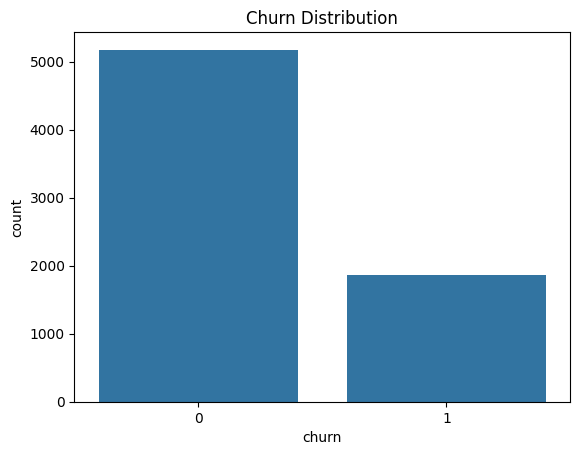

In [37]:

sns.countplot(x="churn", data=df)
plt.title("Churn Distribution")
plt.savefig(os.path.join(ANALYSIS_PATH, "churn_distribution.png"))
plt.show()


### 2 Churn rate

In [39]:

churn_rate = df["churn"].mean()
print(f"Churn Rate: {churn_rate:.2%}")


Churn Rate: 26.54%


### 3. Numerical Features – Distribution by Churn


In [48]:

num_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue="churn", multiple="stack", bins=30)
    plt.title(f"{col} distribution by churn")
    plt.savefig(os.path.join(ANALYSIS_PATH, f"{col}_distribution.png"))
    plt.close()


# ✅ Phase 2 Completed
- Dataset cleaned and saved  
- Target (`Churn`) converted to 0/1  
- Missing values handled  
- Basic EDA done (churn rate, distributions)  
